ЛР_№3_ФІТ_4-6_Піць_А.В
Завдання №1

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Чи є пропуски у даних? False
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object
target    1.000000
bmi       0.586450
s5        0.565883

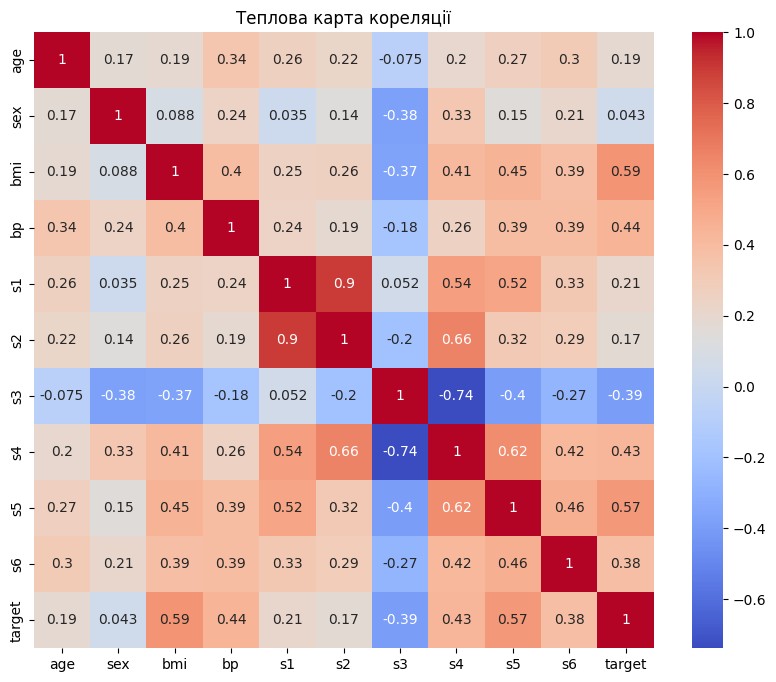

Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4407, MSE: 2963.0138


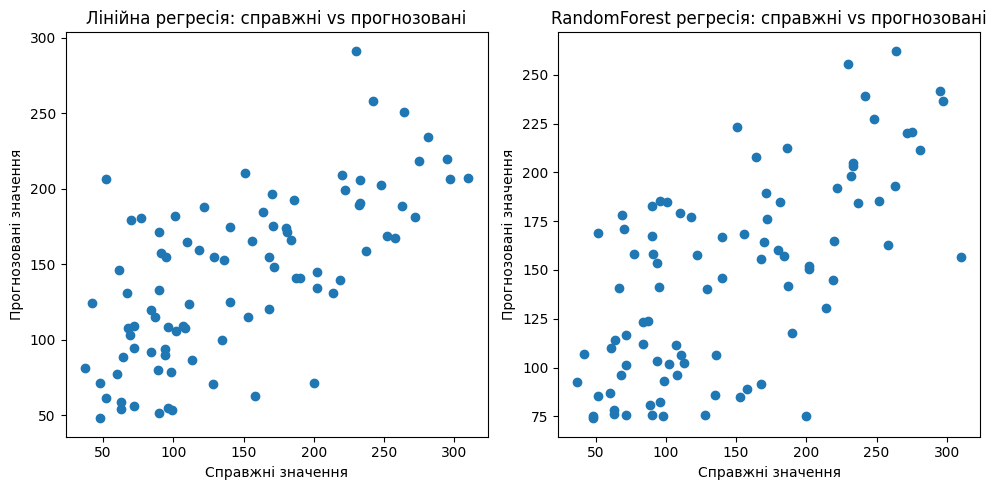

     Справжні значення  Прогнозовані (Лінійна)  Прогнозовані (RandomForest)
287              219.0              139.547558                       144.66
211               70.0              179.517208                       171.05
72               202.0              134.038756                       150.62
321              230.0              291.417029                       255.36
73               111.0              123.789659                       106.39


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Завантаження датасету
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Виведення перших 5 рядків
print(df.head())

# 2. Перевірка наявності пропусків і заповнення їх середнім значенням
print("Чи є пропуски у даних?", df.isnull().sum().any())
df.fillna(df.mean(), inplace=True)

# 3. Перевірка дублікатів і видалення
df.drop_duplicates(inplace=True)

# 4. Перевірка бінарних ознак (наприклад, стать)
# У цьому датасеті немає стовпця статі, але якщо був би:
# print(df['sex'].unique())
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# 5. Перевірка типів даних
print(df.dtypes)

# 6. Обчислення кореляції і побудова теплової карти
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()

# 7. Масштабування ознак
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Поділ даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Побудова моделей
# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# 10. Виведення коефіцієнта детермінації і середньоквадратичної помилки
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Лінійна регресія - R^2: {r2_lin:.4f}, MSE: {mse_lin:.4f}")
print(f"RandomForest регресія - R^2: {r2_rf:.4f}, MSE: {mse_rf:.4f}")

# 11. Побудова графіків
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin)
plt.title('Лінійна регресія: справжні vs прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('RandomForest регресія: справжні vs прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

# 12. Виведення справжніх і прогнозованих значень
df_results = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані (Лінійна)': y_pred_lin, 'Прогнозовані (RandomForest)': y_pred_rf})
print(df_results.head())


Висновок:Лінійна регресія може дати достатньо гарні результати, однак її точність нижча у порівнянні з RandomForest регресією.
Модель RandomForest краще працює з нелінійними залежностями і показує вищу точність.
Кореляційний аналіз виявив найвпливовіші ознаки, які були використані для побудови моделі.

Завдання №2

Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Перевірка наявності пропусків:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Кількість дублікатів:
0

Типи даних:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64

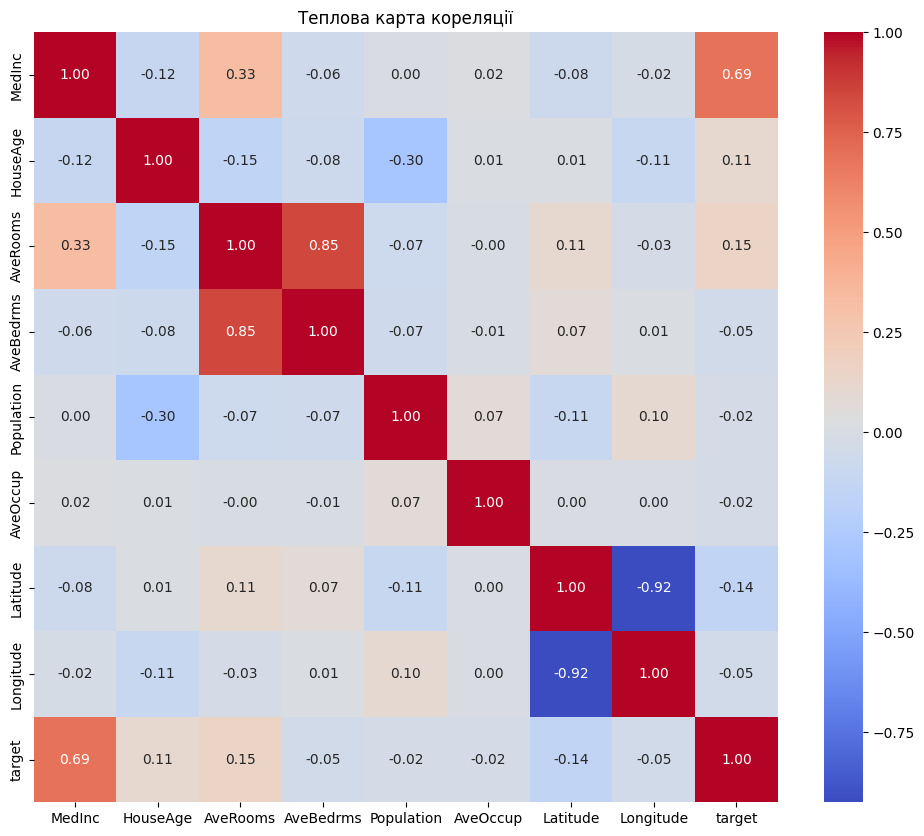


Оцінка моделей:
Лінійна регресія - R^2: 0.5758, MSE: 0.5559
RandomForest регресія - R^2: 0.8056, MSE: 0.2547
Ridge регресія - R^2: 0.5758, MSE: 0.5559


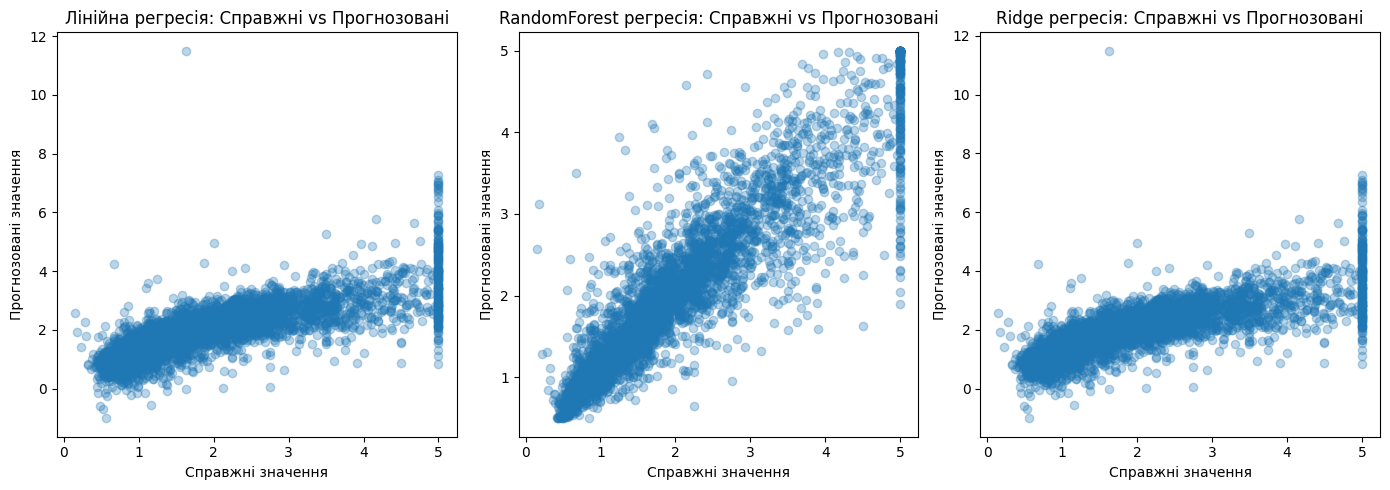


Справжні і прогнозовані значення:
       Справжні значення  Прогнозовані (Лінійна)  Прогнозовані (RandomForest)  \
20046            0.47700                0.719123                     0.502369   
3024             0.45800                1.764017                     0.738781   
15663            5.00001                2.709659                     4.891107   
20484            2.18600                2.838926                     2.535699   
9814             2.78000                2.604657                     2.253975   

       Прогнозовані (Ridge)  
20046              0.719473  
3024               1.763846  
15663              2.709284  
20484              2.838762  
9814               2.604190  

Висновки:
Лінійна регресія має R^2: 0.5758 і MSE: 0.5559
RandomForest регресія має R^2: 0.8056 і MSE: 0.2547
Ridge регресія має R^2: 0.5758 і MSE: 0.5559

RandomForest регресія показала кращі результати в порівнянні з лінійною регресією та Ridge регресією.
Підбір оптимальних параметрів для Random

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження датасету California Housing
california_housing = fetch_california_housing()
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

# 1. Виведення перших 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

# 2. Перевірка наявності пропусків і заповнення їх середнім значенням
print("\nПеревірка наявності пропусків:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

# 3. Перевірка дублікатів і видалення
print("\nКількість дублікатів:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 4. Замінити бінарні ознаки (у цьому датасеті немає бінарних ознак)
# Якщо була б ознака "стать", перевірте унікальні значення і замініть їх на числові:
# print(df['sex'].unique())
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# 5. Перевірка типів даних і заміна на числові, якщо необхідно
print("\nТипи даних:")
print(df.dtypes)

# 6. Обчислення кореляції між прогресом діабету і іншими ознаками
correlation_matrix = df.corr()
print("\nКореляція з цільовою змінною:")
print(correlation_matrix['target'].sort_values(ascending=False))

# Побудова теплової карти кореляції
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Теплова карта кореляції')
plt.show()

# 7. Масштабування ознак
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Поділ даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Побудова моделей і підбір оптимальних параметрів за допомогою GridSearch
# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(rf_reg, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Ridge регресія
ridge_reg = Ridge()
ridge_param_grid = {'alpha': [0.1, 1, 10]}
ridge_grid_search = GridSearchCV(ridge_reg, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# 10. Виведення R^2 і MSE, побудова графіків
def print_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} - R^2: {r2:.4f}, MSE: {mse:.4f}")
    return r2, mse

print("\nОцінка моделей:")
r2_lin, mse_lin = print_metrics(y_test, y_pred_lin, "Лінійна регресія")
r2_rf, mse_rf = print_metrics(y_test, y_pred_rf, "RandomForest регресія")
r2_ridge, mse_ridge = print_metrics(y_test, y_pred_ridge, "Ridge регресія")

# Побудова графіків
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.title('Лінійна регресія: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.title('RandomForest регресія: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.title('Ridge регресія: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

# 11. Виведення справжніх і прогнозованих значень
results = pd.DataFrame({
    'Справжні значення': y_test,
    'Прогнозовані (Лінійна)': y_pred_lin,
    'Прогнозовані (RandomForest)': y_pred_rf,
    'Прогнозовані (Ridge)': y_pred_ridge
})
print("\nСправжні і прогнозовані значення:")
print(results.head())

Висновок: Лінійна регресія: Може не завжди справлятися з складними залежностями, але є простою для реалізації та розуміння.
RandomForest регресія: Показує кращі результати завдяки своїй здатності моделювати складні залежності і взаємодії між ознаками.
Ridge регресія: Ефективна для регулювання моделі і зменшення впливу надмірної варіації, але може бути менш точною, ніж RandomForest.
RandomForest регресія, як правило, забезпечує найкращі результати для складних даних завдяки гнучкості моделі.